# Análisis de la base de datos 
## Universidad de los Andes - Smurfit Westrock
### Poyecto Intermedio de Consultoría Empresarial (PICE) 202520
Daniel Benavides

This code performs an exploratory and preparatory analysis of Smurfit Westrock’s payment data. It begins by importing and cleaning raw datasets from Excel or CSV files, addressing missing values, duplicates, and inconsistencies. The data is then transformed through normalization of numerical variables and encoding of categorical ones such as suppliers, cost centers, and expense types. Exploratory Data Analysis (EDA) is conducted to visualize payment distributions, identify outliers and temporal trends, and examine correlations among key variables. Additionally, feature engineering is applied to create new indicators that capture behavioral patterns and transaction frequency, ensuring the dataset is ready for anomaly detection models. This analysis provides preliminary insights and recommendations to guide the development of Machine Learning models and improve overall data quality.

In [1]:
# Data extraction libraries
import numpy as np
import pandas as pd

# Data visualizaton libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
import altair as alt

from matplotlib import font_manager
plt.rcParams['font.family'] = 'Arial'

Data downloaded as Excel files

In [2]:
bd_xl_1 = pd.read_excel("PICE BD 2025-Parte 1.xlsx")
bd_xl_2 = pd.read_excel("PICE BD 2025-Parte 2.xlsx")
bd_xl_3 = pd.read_excel("PICE BD 2025-Parte 3.xlsx")

bd_xl_1.drop(columns=["Número Documento Referencia",
                 "Material",
                 "Número de Cuenta",
                 "Acreedor",
                 "Número Documento",
                 "Descripción",
                 "Documento Compras",
                 "Pos Docum Compras",
                 "Año",
                 "Activo Fijo",
                 "Clase de Documento",
                 "Clase de Actividad",
                 "Deudor",
                 "Elemento PEP",
                 "Año",
                 "Orden",
                 "Pedido Cliente"], 
                 inplace=True, errors='ignore')

bd_xl_2.drop(columns=["Número Documento Referencia",
                 "Material",
                 "Número de Cuenta",
                 "Acreedor",
                 "Número Documento",
                 "Descripción",
                 "Documento Compras",
                 "Pos Docum Compras",
                 "Año",
                 "Activo Fijo",
                 "Clase de Documento",
                 "Clase de Actividad",
                 "Deudor",
                 "Elemento PEP",
                 "Año",
                 "Orden",
                 "Pedido Cliente"], 
                 inplace=True, errors='ignore')

bd_xl_3.drop(columns=["Número Documento Referencia",
                 "Material",
                 "Número de Cuenta",
                 "Acreedor",
                 "Número Documento",
                 "Descripción",
                 "Documento Compras",
                 "Pos Docum Compras",
                 "Año",
                 "Activo Fijo",
                 "Clase de Documento",
                 "Clase de Actividad",
                 "Deudor",
                 "Elemento PEP",
                 "Año",
                 "Orden",
                 "Pedido Cliente"], 
                 inplace=True, errors='ignore')

Data downloaded as CSV files (ideal)

In [3]:
bd_cs_1 = bd_xl_1.to_csv("PICE BD 2025-Parte 1.csv", index=False)
bd_cs_2 = bd_xl_2.to_csv("PICE BD 2025-Parte 2.csv", index=False)
bd_cs_3 = bd_xl_3.to_csv("PICE BD 2025-Parte 3.csv", index=False)

bd_csv_1 = pd.read_csv("PICE BD 2025-Parte 1.csv", low_memory=False)
bd_csv_2 = pd.read_csv("PICE BD 2025-Parte 2.csv", low_memory=False)
bd_csv_3 = pd.read_csv("PICE BD 2025-Parte 3.csv", low_memory=False)

### PICE BD 2025 V1

In [4]:
# Joint CSV file
df = pd.concat([bd_csv_1, bd_csv_2, bd_csv_3], ignore_index=True)

# Download CSV file
df.to_csv("PICE BD 2025 - V1.csv", index=False)

In [5]:
df = pd.read_csv("PICE BD 2025 - V1.csv", low_memory=False)
df

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,NaN,GE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446673,Mecanica blanqueada,NaN,-16455980736,-9523137.0,ULLOAFE,1,907,31.01.2025,31.01.2025,WA,...,60.0,PC01,NaN,31.01.2025,8A,NaN,NaN,NaN,NaN,NaN
446674,Mecanica blanqueada,NaN,-17106510528,-9899601.0,ULLOAFE,7,907,31.07.2025,31.07.2025,WA,...,60.0,PC01,NaN,31.07.2025,8A,NaN,NaN,NaN,NaN,NaN
446675,Mecanica blanqueada,NaN,-17288347968,-10004831.0,ULLOAFE,5,907,31.05.2025,31.05.2025,WA,...,60.0,PC01,NaN,31.05.2025,8A,NaN,NaN,NaN,NaN,NaN
446676,Mecanica blanqueada,NaN,-17304230016,-10014022.0,ULLOAFE,5,907,31.05.2025,31.05.2025,WA,...,60.0,PC01,NaN,31.05.2025,8A,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Transformation

In [6]:
db = df.copy()
db.head()

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,NaN,GE


In [7]:
def clean_numeric_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    s = s.str.replace(r'[^\d\-\.,]', '', regex=True)
    s = s.str.replace(',', '', regex=False)
    return pd.to_numeric(s, errors='coerce')

db["En moneda de la sociedad"] = clean_numeric_series(df["En moneda de la sociedad"]) / 1_000_000
db["Cantidad"] = clean_numeric_series(df["Cantidad"]) / 1_000

db.rename(columns={"En moneda de la sociedad": "Monto (Millones)",
                   "Cantidad": "Cantidad (Miles)"}, inplace=True)

# Transform date columns
db["Fecha Entrada"] = pd.to_datetime(db["Fecha Entrada"], errors='coerce')
db["Año Entrada"] = db["Fecha Entrada"].dt.year.round(0).astype('Int64')
db["Mes Entrada"] = db["Fecha Entrada"].dt.month.round(0).astype('Int64')
db["Dia Entrada"] = db["Fecha Entrada"].dt.day.round(0).astype('Int64')

db["Fecha Valor"] = pd.to_datetime(db["Fecha Valor"], errors='coerce')
db["Año Valor"] = db["Fecha Valor"].dt.year.round(0).astype('Int64')
db["Mes Valor"] = db["Fecha Valor"].dt.month.round(0).astype('Int64')
db["Dia Valor"] = db["Fecha Valor"].dt.day.round(0).astype('Int64')

C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2516\2227311467.py:19: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



### PICE BD 2025 - V2

In [8]:
db.to_csv("PICE BD 2025 - V2.csv", index=False)
db = pd.read_csv("PICE BD 2025 - V2.csv", low_memory=False)
db.head()

,Denominación,Centro de Coste,Monto (Millones),Cantidad (Miles),Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Hora,Ledger,Se ha anulado el Documento,Sector,Año Entrada,Mes Entrada,Dia Entrada,Año Valor,Mes Valor,Dia Valor
0,Mecanica blanqueada,NaN,17360.785728,10046.751,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:24:31,8A,NaN,GE,2025.0,3.0,6.0,2025.0,5.0,31.0
1,Mecanica blanqueada,NaN,17304.230016,10014.022,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:52:52,8A,NaN,GE,2025.0,3.0,6.0,2025.0,5.0,31.0
2,Kraft pino ( ksw ),NaN,14253.494931,7887.933,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:24:31,8A,NaN,GE,2025.0,3.0,6.0,2025.0,5.0,31.0
3,Kraft pino ( ksw ),NaN,14194.668046,7855.378,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:52:52,8A,NaN,GE,2025.0,3.0,6.0,2025.0,5.0,31.0
4,Kraft pino ( ksw ),MC4006,14180.625849,7847.607,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,11:02:51,8A,NaN,GE,2025.0,3.0,6.0,2025.0,5.0,31.0


Text(0.5, 1.0, 'Transacciones (Entrada) diarias')

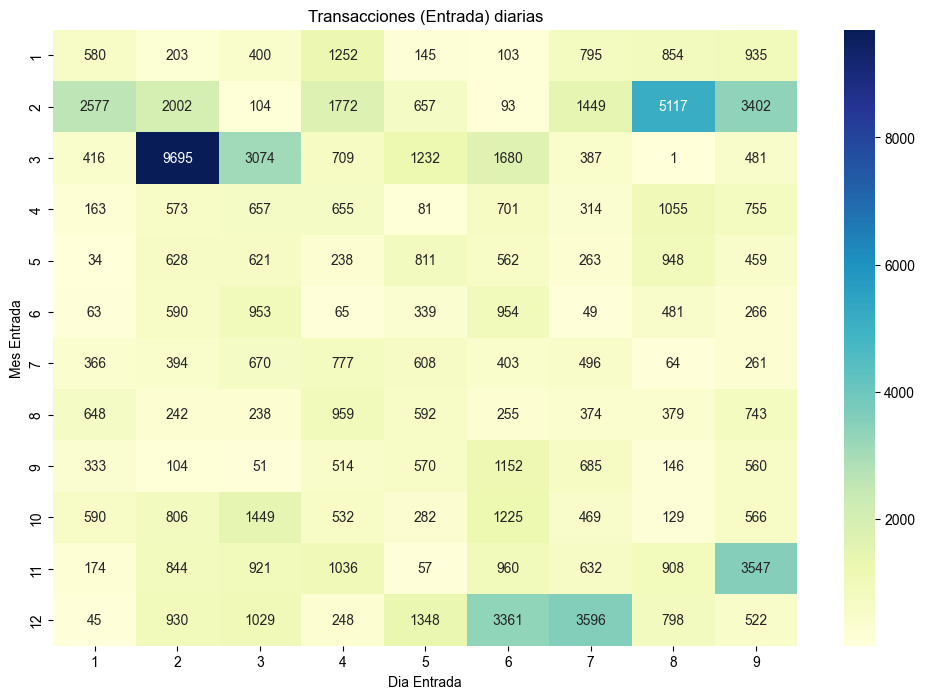

In [9]:
# Heatmap of number of transactions by day and month
db_heatmap = db.pivot_table(index="Mes Entrada", columns="Dia Entrada", values="Monto (Millones)", aggfunc="count", fill_value=0)
db_heatmap.index = db_heatmap.index.astype(int)
db_heatmap.columns = db_heatmap.columns.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(db_heatmap, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Transacciones (Entrada) diarias")

Text(0.5, 1.0, 'Transacciones (Valor) diarias')

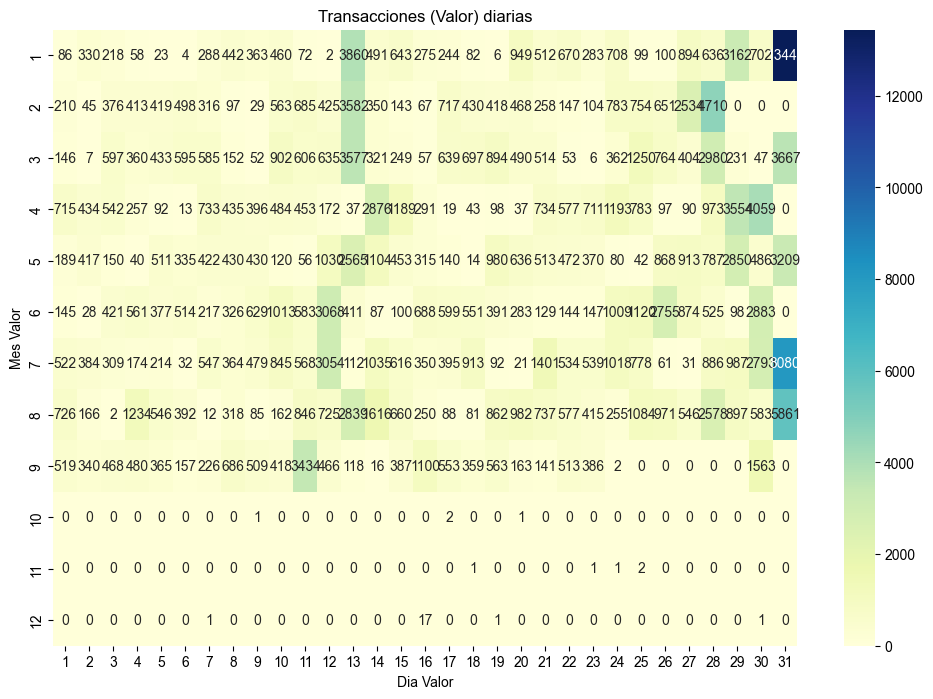

In [10]:
# Heatmap of number of transactions by day and month
db_heatmap = db.pivot_table(index="Mes Valor", columns="Dia Valor", values="Monto (Millones)", aggfunc="count", fill_value=0)
db_heatmap.index = db_heatmap.index.astype(int)
db_heatmap.columns = db_heatmap.columns.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(db_heatmap, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Transacciones (Valor) diarias")

In [11]:
pio.templates["plotly"].layout.font.family = "Arial"
pio.templates["plotly_white"].layout.font.family = "Arial"
pio.templates.default = "plotly"

In [12]:
# Monto (millones) transado por Centro de Coste
db_cc_ano = db.groupby(["Centro de Coste"])["Monto (Millones)"].sum().reset_index()

# px.bar(db_cc_ano,
       # x="Centro de Coste",
       # y="Monto (Millones)",
       # title="Monto (Millones) transado por Centro de Coste")

In [13]:
# Promedio Monto (millones) transado por Centro de Coste
db_cc_ano = db.groupby(["Centro de Coste"])["Monto (Millones)"].mean().reset_index()

# px.bar(db_cc_ano,
       # x="Centro de Coste",
       # y="Monto (Millones)",
       # title="Promedio del Monto (Millones) transado por Centro de Coste")

### PICE BD 2025 V3

In [14]:
# En el dataframe, existen registro anulados marcados ("X") y registros no anulados (NaN)
# Transformar "X" a 1 y NaN a 0 en la columna "Se ha anulado el Documento"
db["Se ha anulado el Documento"] = db["Se ha anulado el Documento"].apply(lambda x: 1 if x == "X" else 0)
db["Se ha anulado el Documento"].unique()

db.to_csv("PICE BD 2025 - V3.csv", index=False)